<b> Visual Analytics 2015 </b>

Johannes Wöß, k1255503

<b> Chosen Dataset:</b>  http://data.gov.uk -> Road Safety Statistics 2014

In [2]:
#disable some annoying warning
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

#include some package which we use later on
import numpy as np
import pandas as pd


#plots the figures in place instead of a new window
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


D:\Programme\Anaconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [72]:
#read dataset
accidents = pd.read_csv('data/roadsafety_uk_2014.csv')
accidents.index = accidents.pop('﻿Accident_Index')
accFilt = accidents.drop(axis=1, labels=['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Police_Force'])
accFilt =   accFilt.drop(axis=1, labels=['Local_Authority_(District)', 'Local_Authority_(Highway)'])
accFilt =   accFilt.drop(axis=1, labels=['Did_Police_Officer_Attend_Scene_of_Accident', 'LSOA_of_Accident_Location'])
accFilt['Date'] = pd.to_datetime(accFilt['Date'])
accFilt = accFilt[(accFilt[:]) != -1]
accFilt.size / accFilt.columns.size

146322.0

In [4]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [5]:
months[11]

'December'

<b>Visualisation</b>

In [6]:
accFilt.head(10).mean()

Longitude                                   -0.194279
Latitude                                    51.498675
Accident_Severity                            3.000000
Number_of_Vehicles                           2.000000
Number_of_Casualties                         1.000000
Day_of_Week                                  4.300000
1st_Road_Class                               3.700000
1st_Road_Number                            779.200000
Road_Type                                    5.100000
Speed_limit                                 30.000000
Junction_Detail                              3.100000
Junction_Control                             3.000000
2nd_Road_Class                               3.900000
2nd_Road_Number                            322.400000
Pedestrian_Crossing-Human_Control            0.000000
Pedestrian_Crossing-Physical_Facilities      2.200000
Light_Conditions                             2.800000
Weather_Conditions                           1.300000
Road_Surface_Conditions     

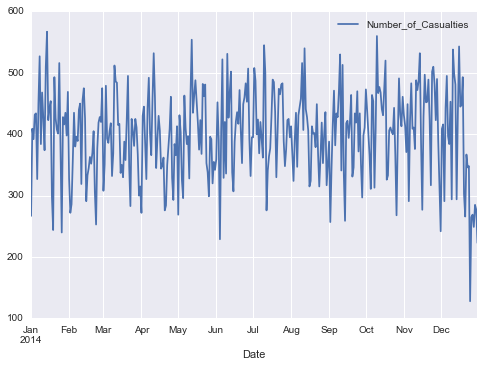

In [7]:
accFilt.groupby('Date').agg({ 'Number_of_Casualties': 'count'}).plot()

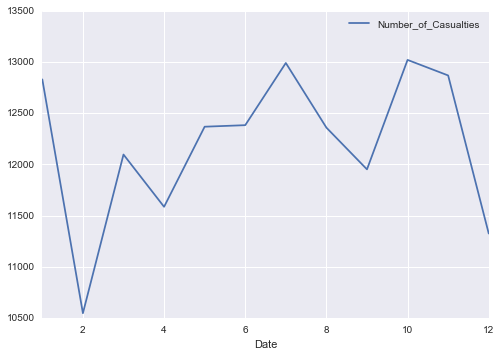

In [16]:
accFilt.groupby(accFilt.Date.dt.month).agg({ 'Number_of_Casualties': 'count'}).plot()

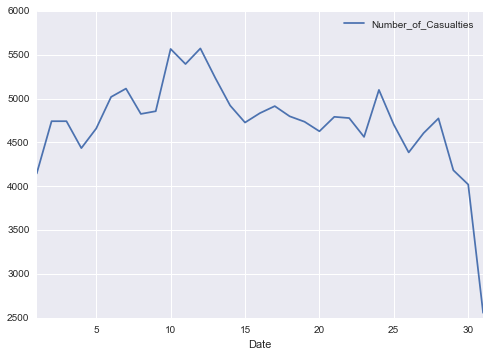

In [17]:
accFilt.groupby(accFilt.Date.dt.day).agg({ 'Number_of_Casualties': 'count'}).plot()

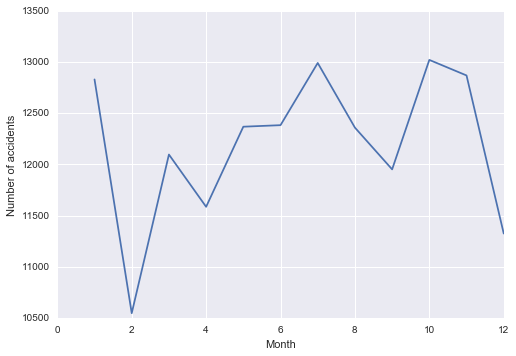

In [34]:
plt.plot(accFilt.groupby(accFilt.Date.dt.month).agg({ 'Number_of_Casualties': 'count'}))
plt.xlabel('Month')
plt.ylabel('Number of accidents')
plt.title('')
plt.show()

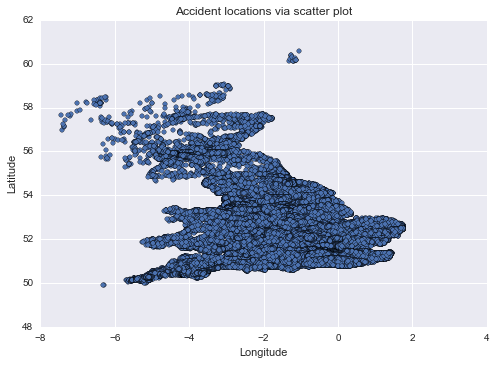

In [35]:
accFilt.plot(kind='scatter', x='Longitude',y='Latitude', title='Accident locations via scatter plot')

In [10]:
from mpl_toolkits.basemap import Basemap
import matplotlib.cm as cm

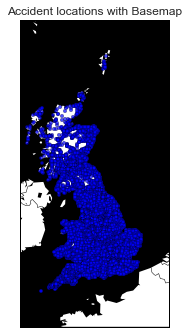

In [58]:
x=accFilt.Longitude.values
y=accFilt.Latitude.values
z=[]
#m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,\
#            llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
#m = Basemap(width=12000000,height=9000000,projection='lcc',
#            resolution='c',lat_1=45.,lat_2=55,lat_0=52,lon_0=0, lon_1=-8.,lon_2=4)

m = Basemap(projection='merc',
    resolution = 'l', area_thresh = 0.5,
    llcrnrlon=-8, llcrnrlat=48,
    urcrnrlon=4, urcrnrlat=62)

x1,y1 = m(x,y)

m.drawmapboundary(fill_color='black') # fill to edge
m.drawcountries()
m.fillcontinents(color='white',lake_color='black',zorder=0)

m.scatter(x1,y1,s=50,marker=".",cmap=cm.cool,alpha=0.7)
plt.title("Accident locations with Basemap")
plt.show()

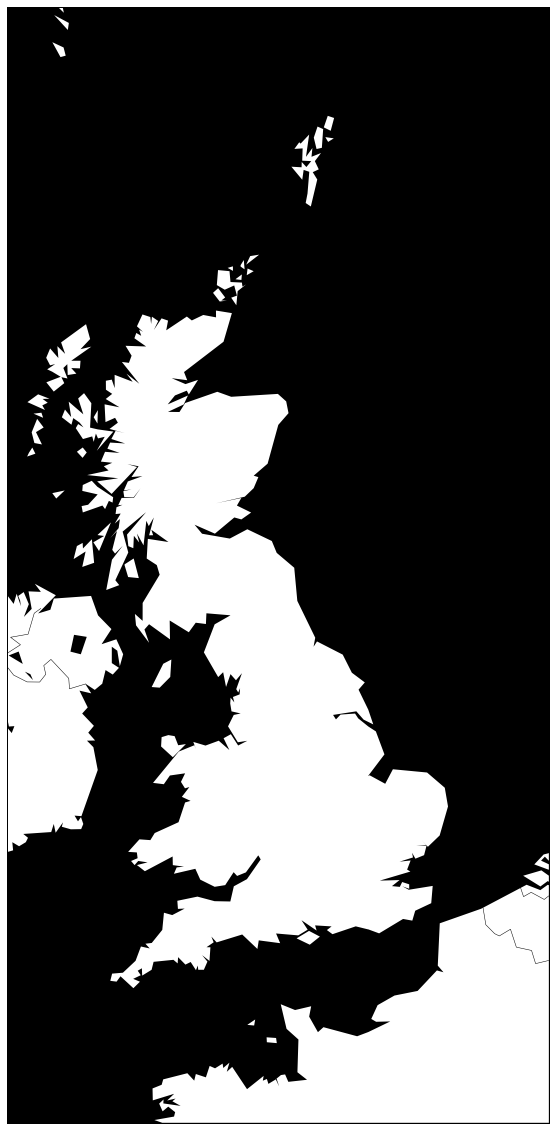

In [75]:
xedges = np.arange(-8, 4, 0.1)
yedges = np.arange(48, 62, 0.1)
heatmap, xedges, yedges = np.histogram2d(accFilt.Longitude, accFilt.Latitude, bins=(xedges, yedges))
extent = [-8, 4, 48, 62]

plt.clf()
m = Basemap(projection='merc',
    resolution = 'l', area_thresh = 0.5,
    llcrnrlon=-8, llcrnrlat=48,
    urcrnrlon=4, urcrnrlat=62)

plt.figure(figsize=(40,20))
plt.subplot(121)

m.drawmapboundary(fill_color='black') # fill to edge
m.drawcountries()
m.fillcontinents(color='white',lake_color='black',zorder=0)
plt.subplot(121)
plt.imshow(heatmap, extent=extent)
plt.show()


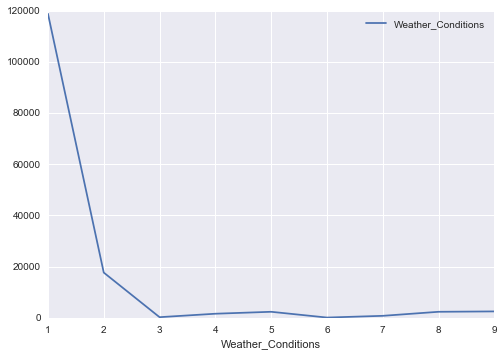

In [76]:
accFilt.groupby(accFilt.Weather_Conditions).agg({ 'Weather_Conditions': 'count'}).plot()